### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
dataset=pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df=dataset.copy()

### Data Summary

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [6]:
df.info() # total_bedrooms have null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Exploratory Data Analysis

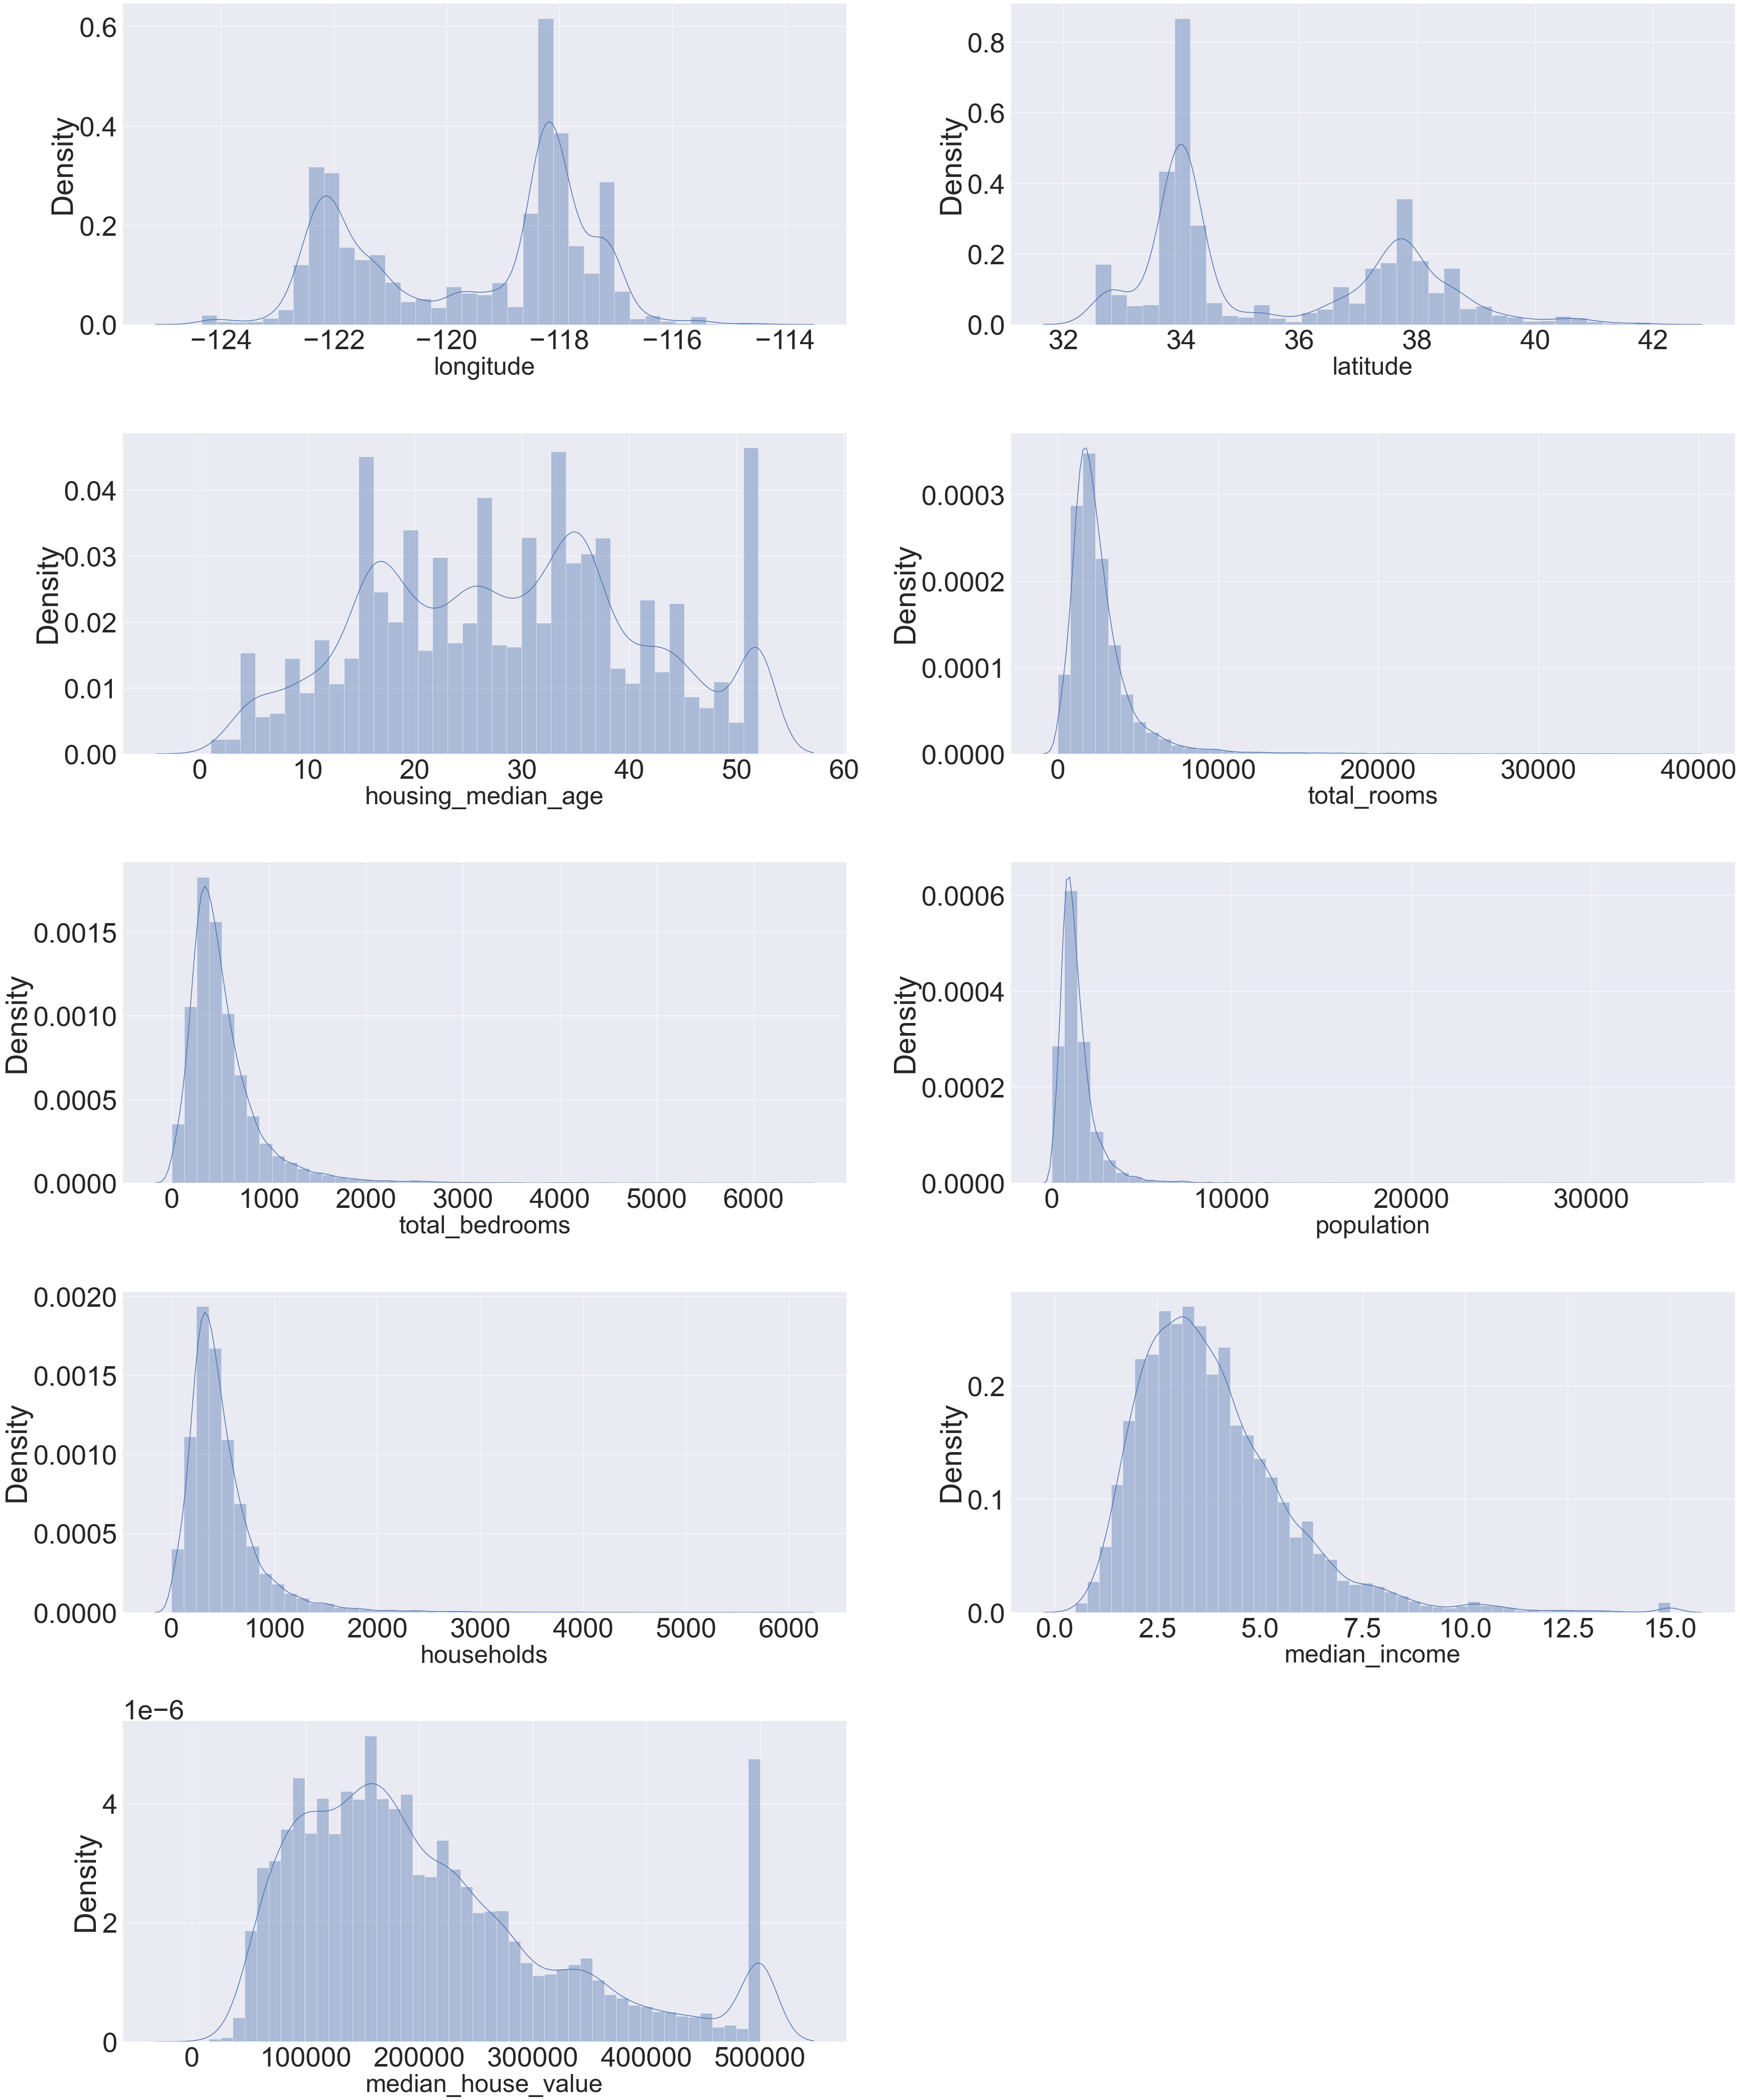

In [7]:
col=2
row=5
counter=1
plt.figure(figsize=(50,60))
sns.set(font_scale=5)
num_col_=df.select_dtypes('float64').columns
for i in num_col_:
    plt.subplot(row,col,counter)
    plt.xlabel(i,fontsize=50)    
    sns.distplot(df[i])
    counter=counter+1
    plt.tight_layout()

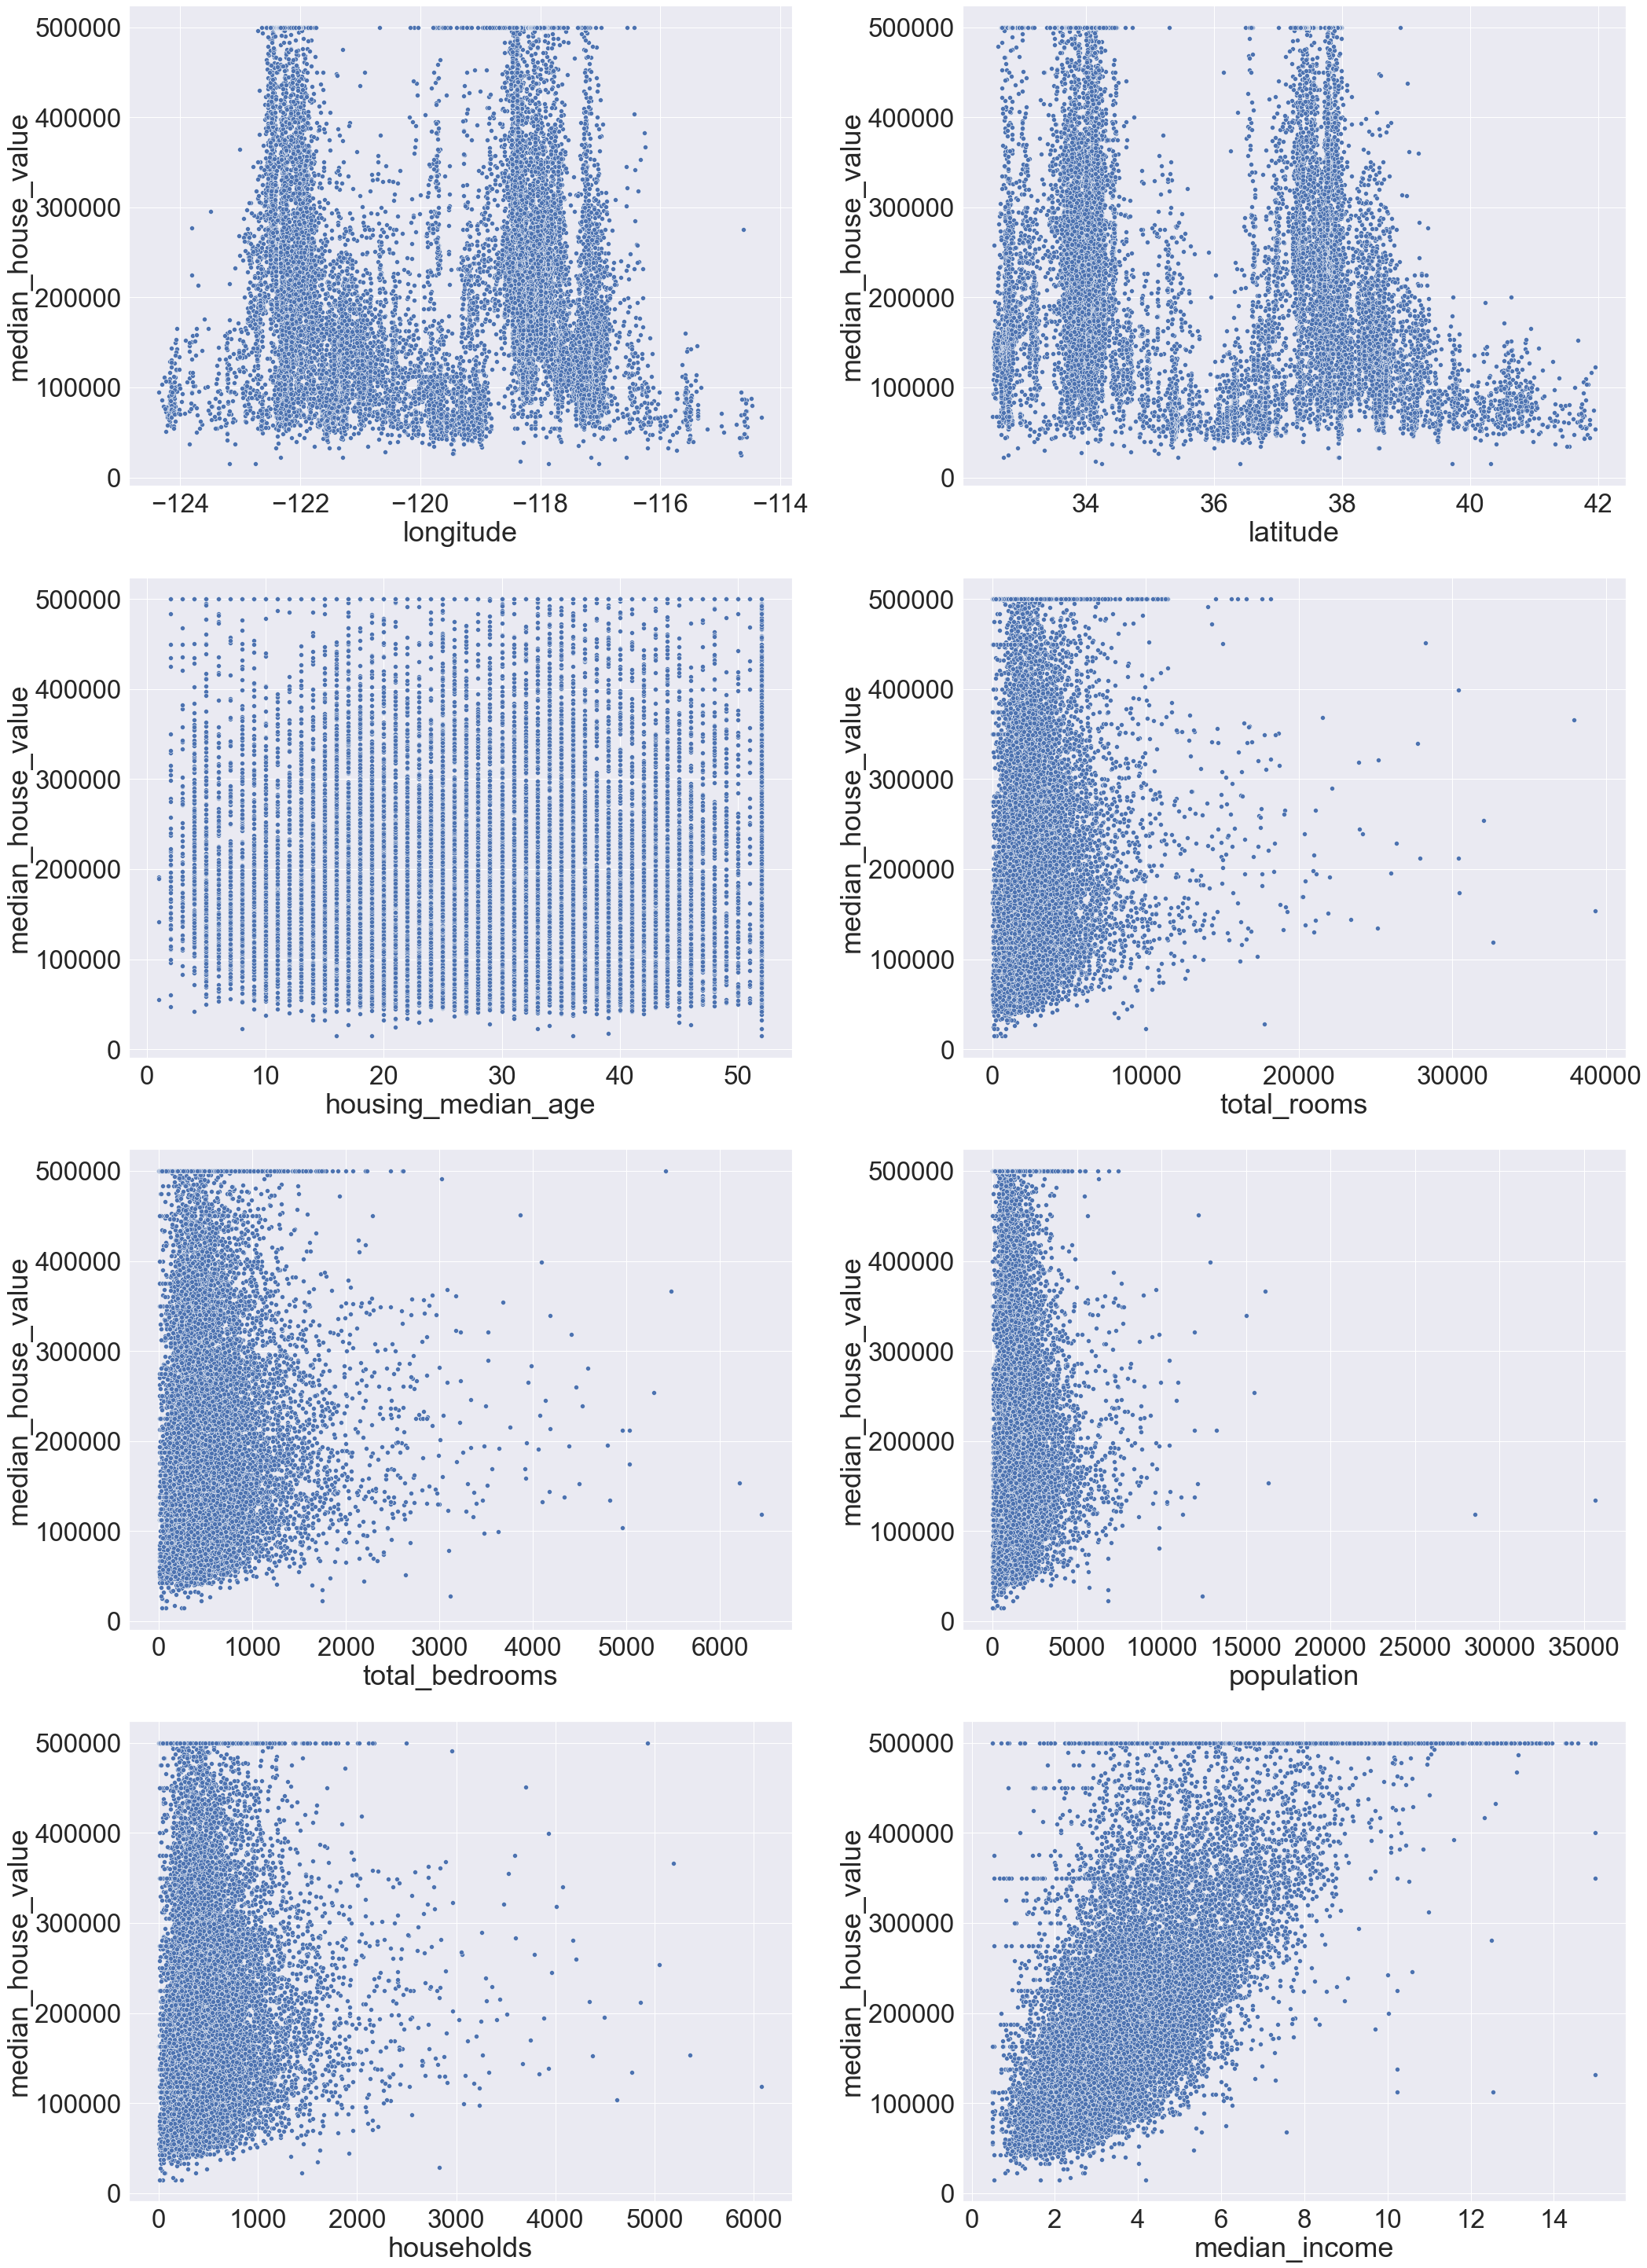

In [8]:
col=2
row=5
counter=1
plt.figure(figsize=(30,50))
sns.set(font_scale=3)
num_col=df.select_dtypes('float64').columns[0:8]
for i in num_col:
    plt.subplot(row,col,counter)    
    sns.scatterplot(x=df[i],y=df['median_house_value'])
    counter=counter+1
    plt.tight_layout()

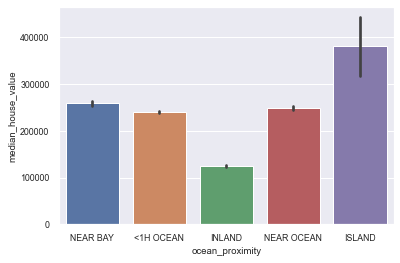

In [9]:
sns.set(font_scale=0.8)
sns.barplot(x=df['ocean_proximity'],y=df['median_house_value'])
plt.show()

### Null Value Check & Treatment

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Outliers Detection

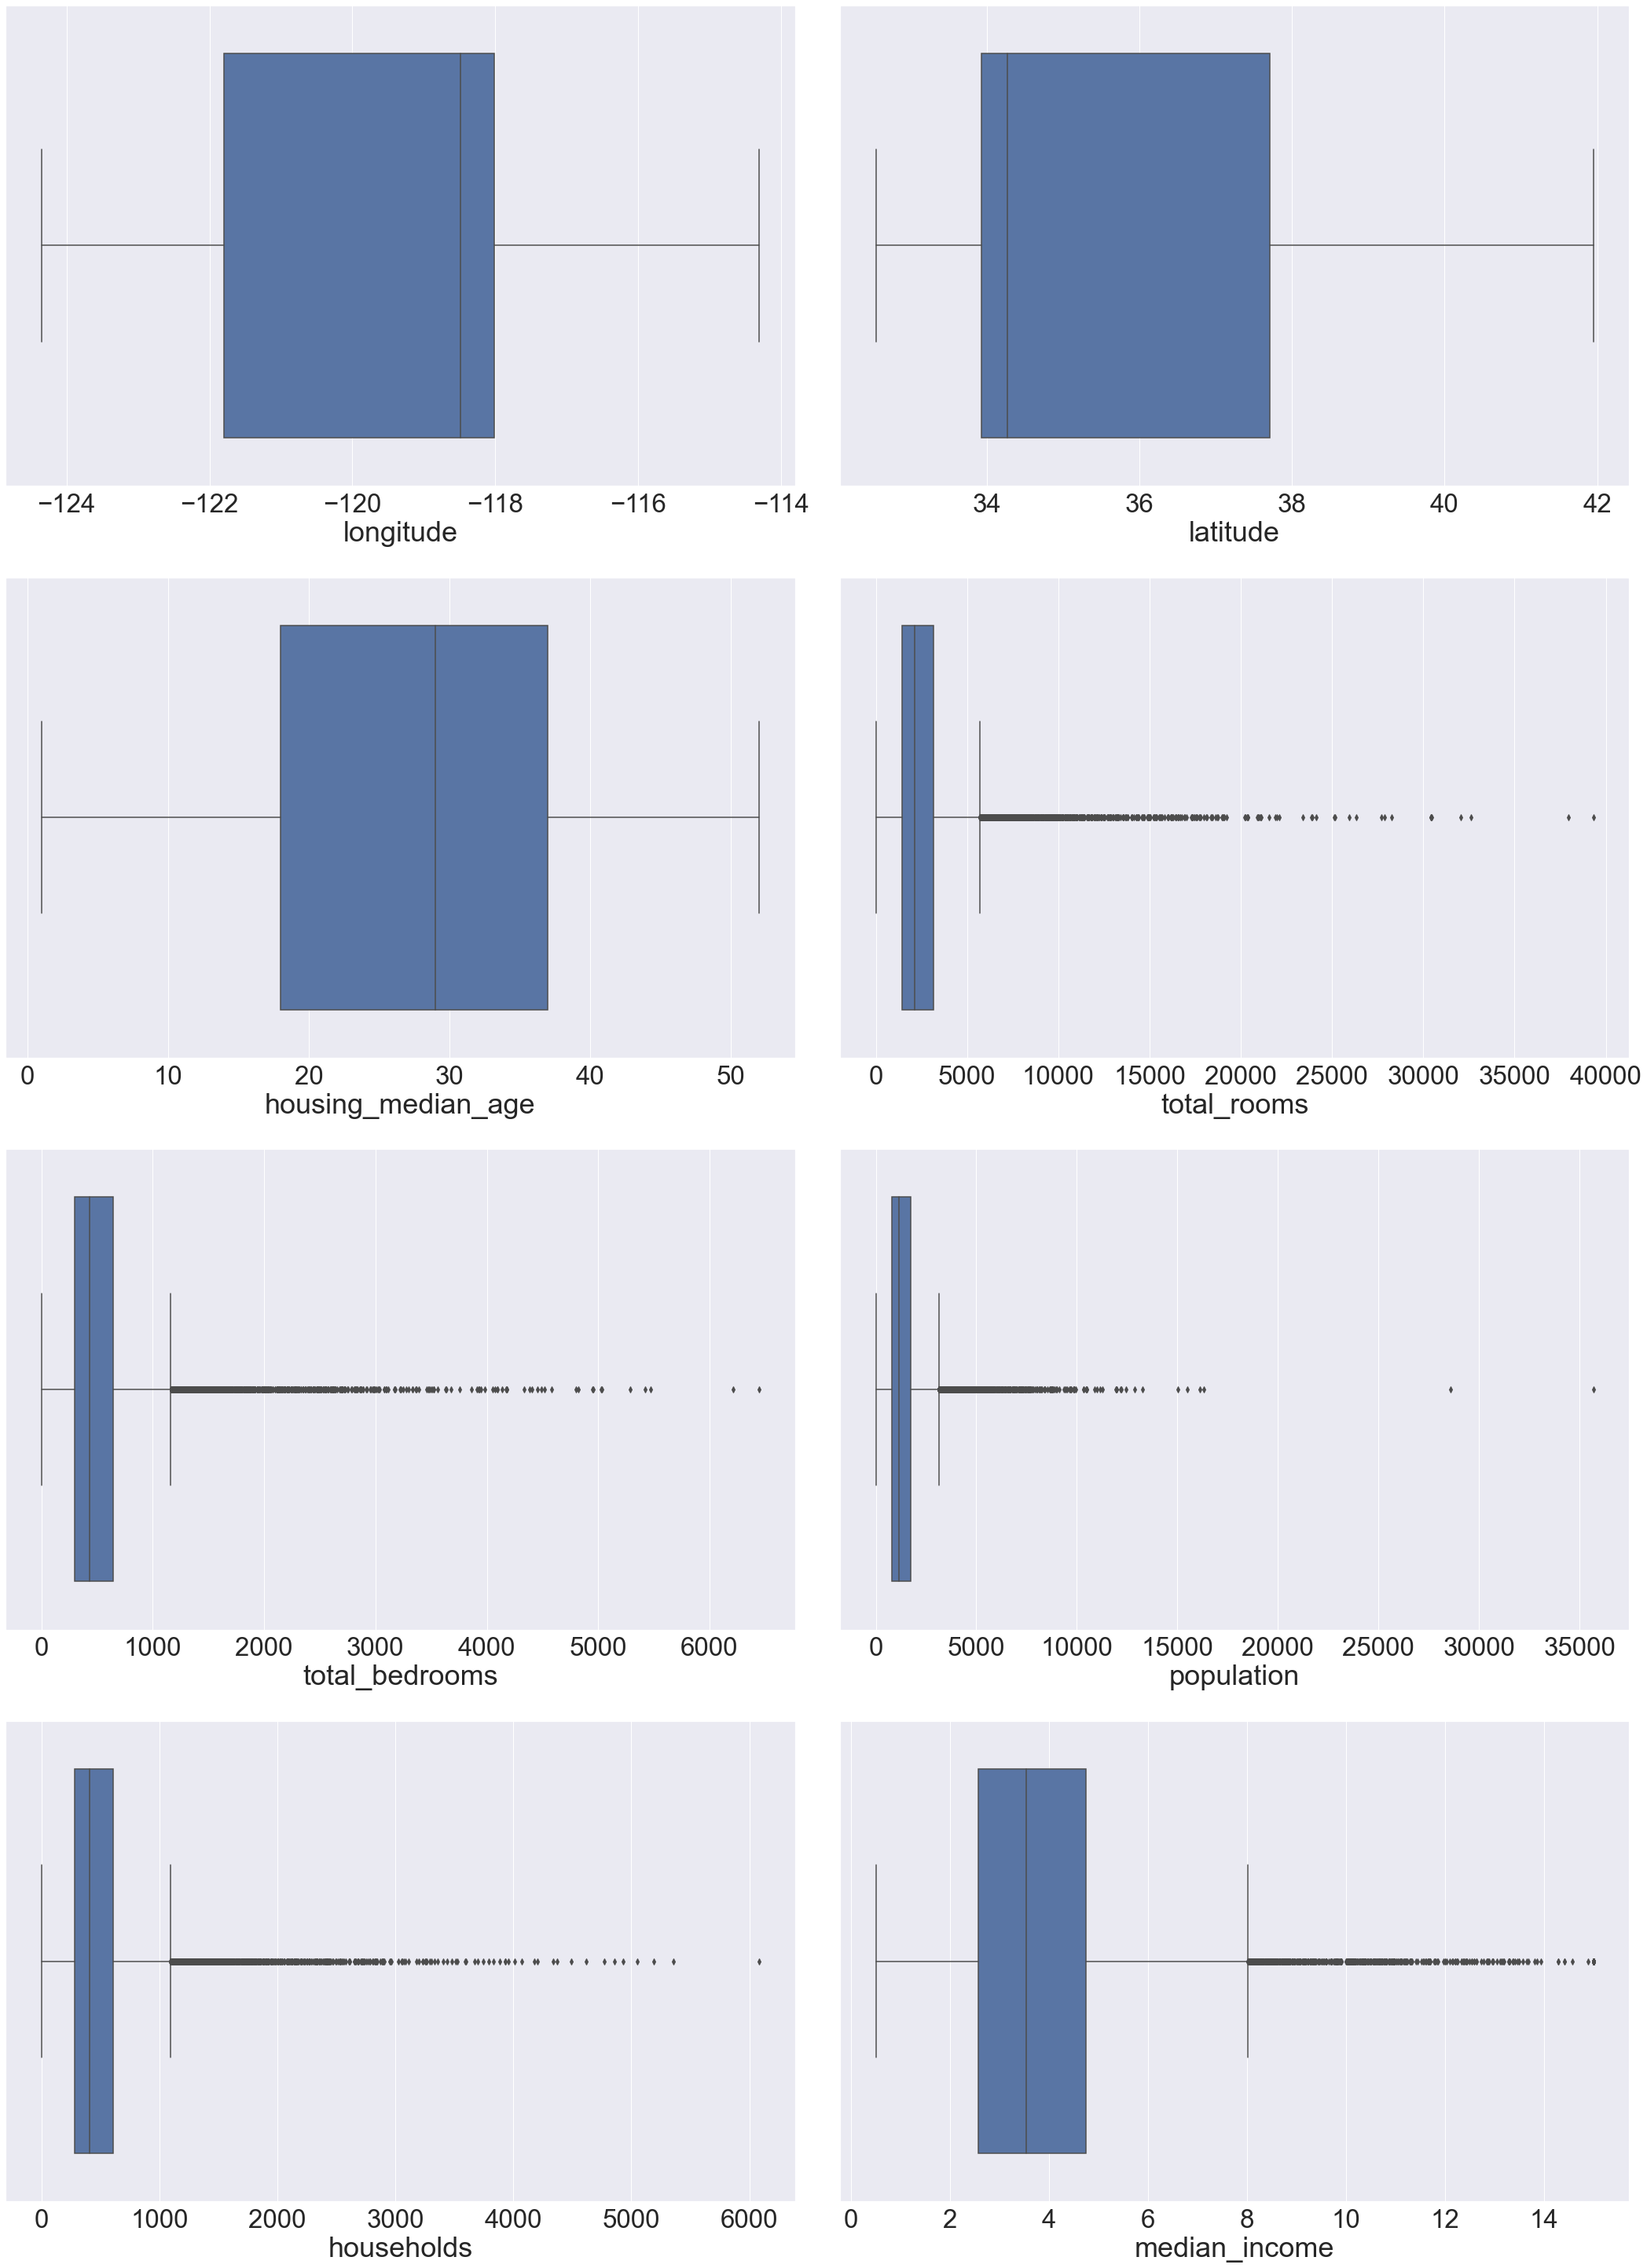

In [13]:
col=2
row=5
counter=1
plt.figure(figsize=(30,50))
sns.set(font_scale=3)
num_col=df.select_dtypes('float64').columns[0:8]
for i in num_col:
    plt.subplot(row,col,counter)    
    sns.boxplot(df[i])
    counter=counter+1
    plt.tight_layout()

### Capping of Variable containing Outliers

In [14]:
cap_col=['total_rooms','total_bedrooms','population','households','median_income']

In [15]:
for i in cap_col:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        df[i]=np.where(df[i]>upper,upper,df[i])

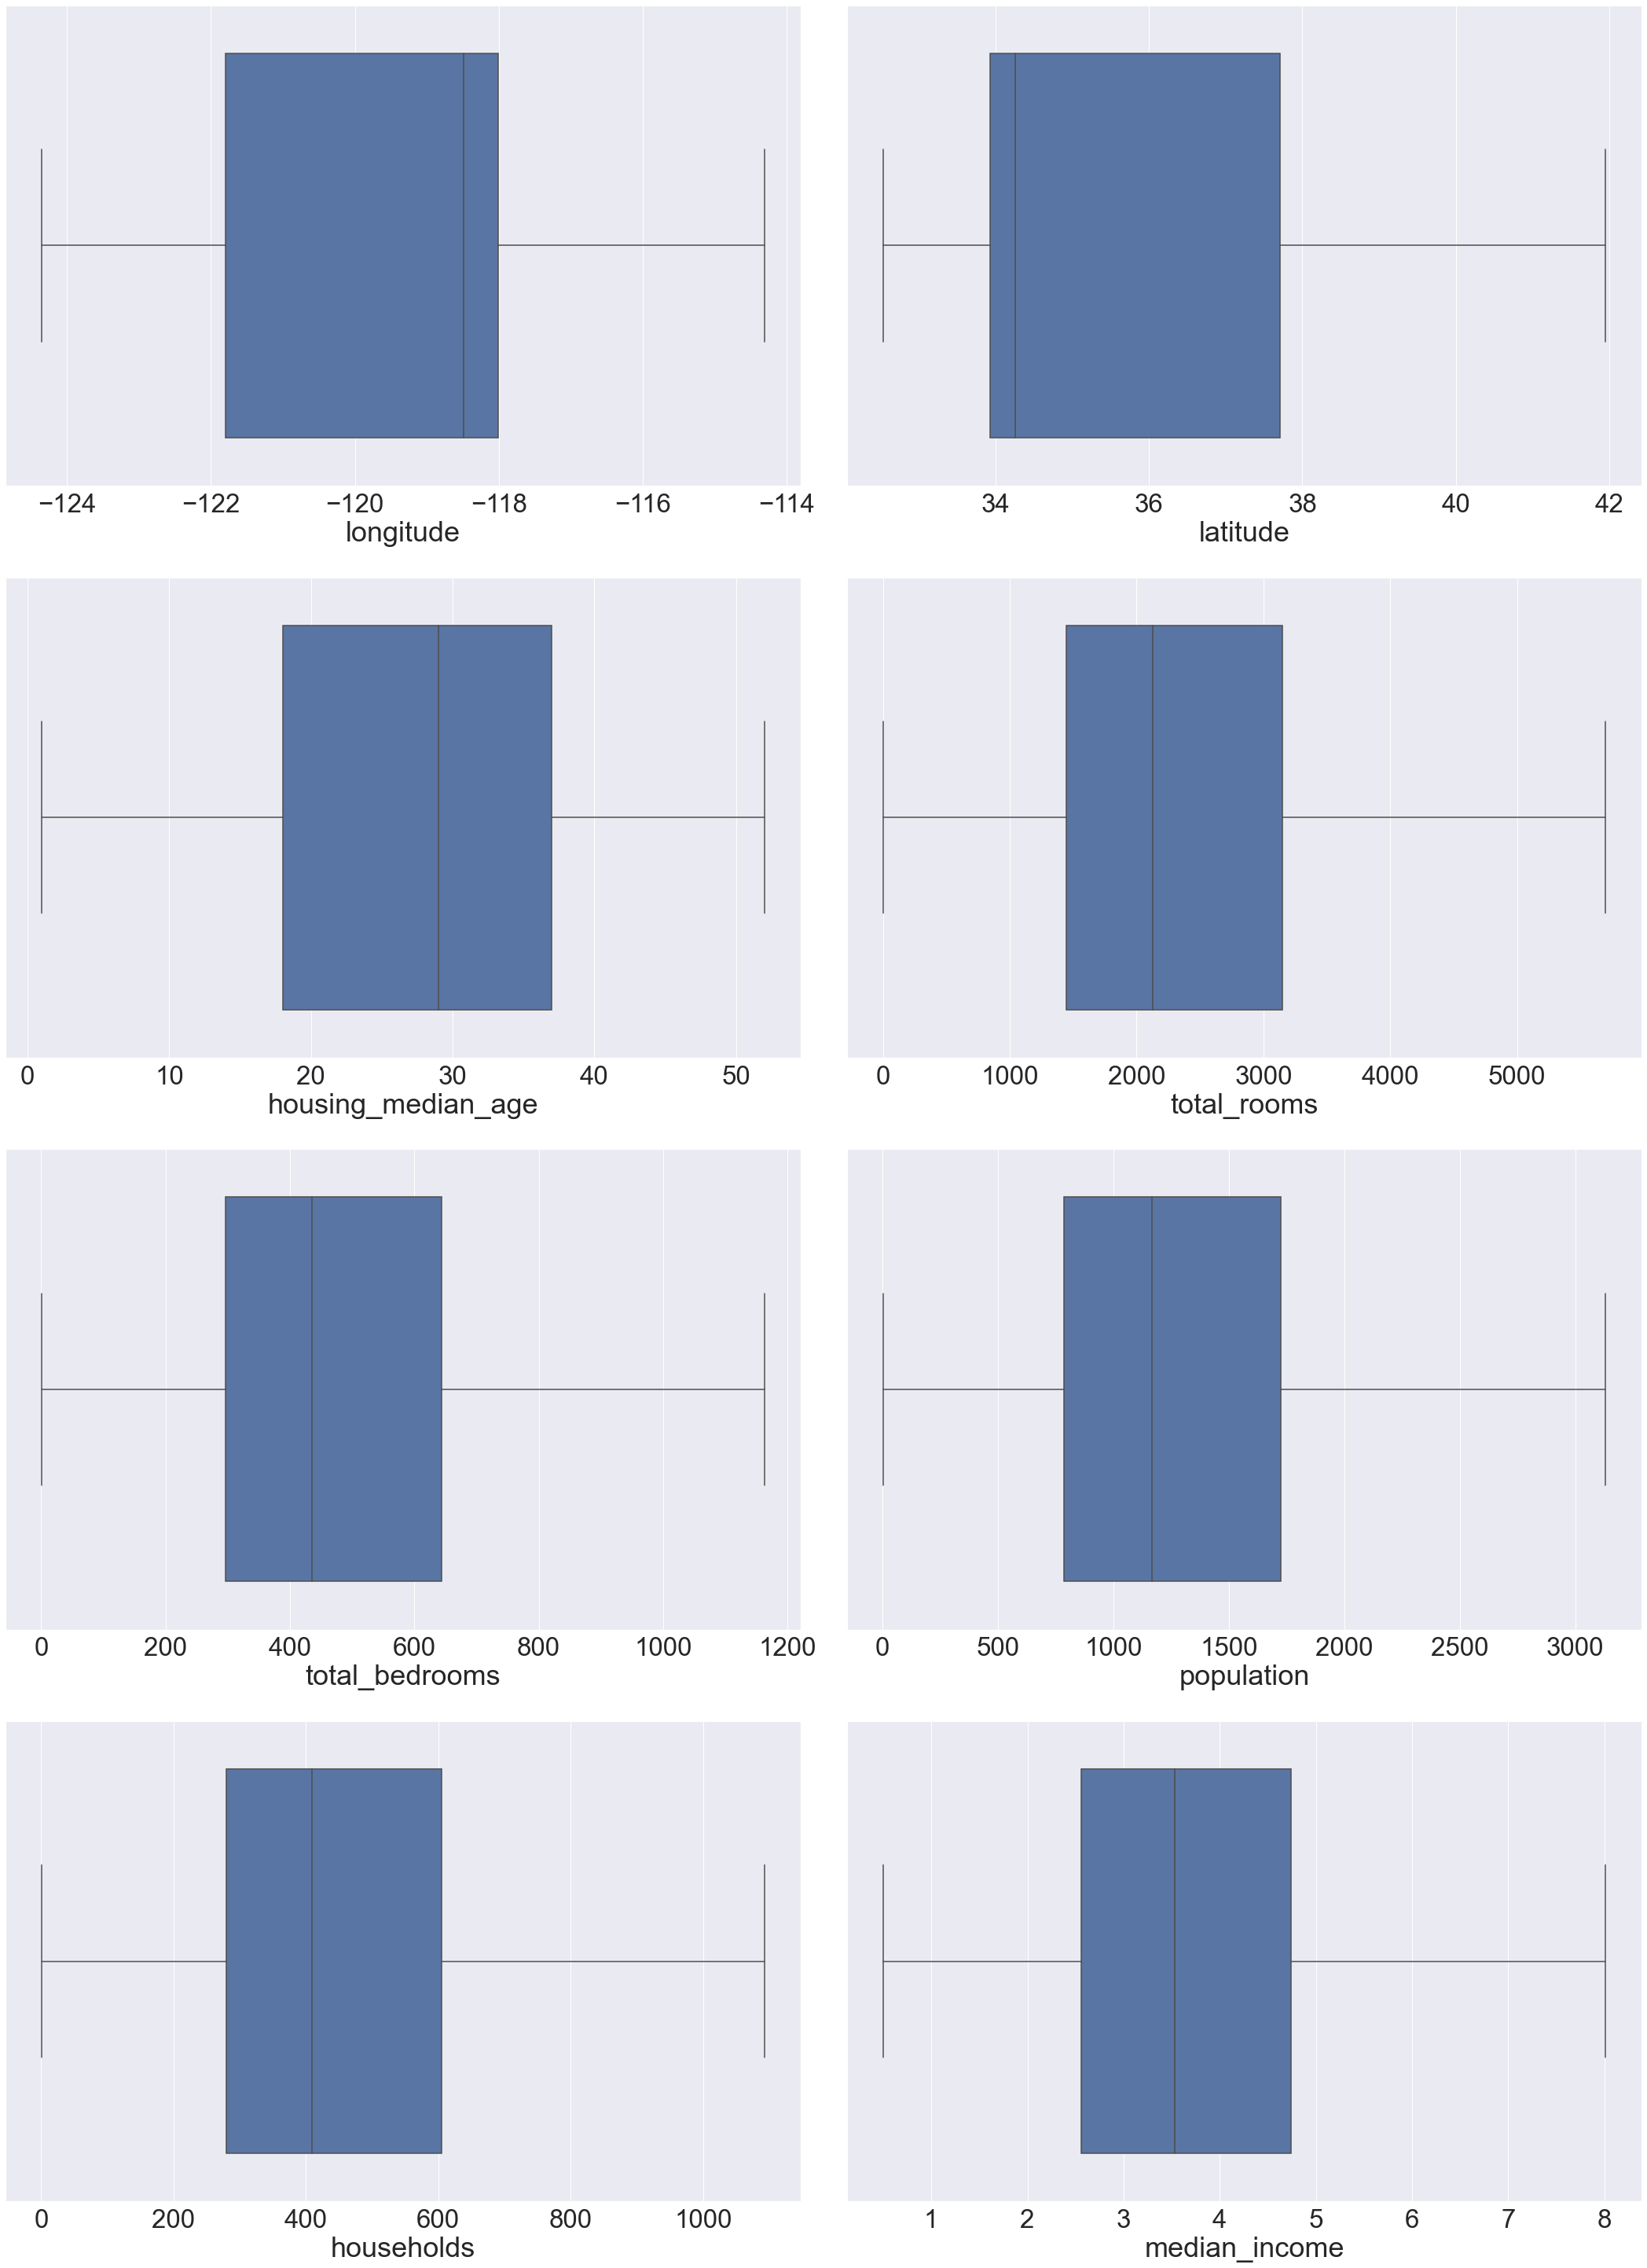

In [16]:
col=2
row=5
counter=1
plt.figure(figsize=(30,50))
sns.set(font_scale=3)
num_col=df.select_dtypes('float64').columns[0:8]
for i in num_col:
    plt.subplot(row,col,counter)    
    sns.boxplot(df[i])
    counter=counter+1
    plt.tight_layout()

### Unique Value Check

In [17]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            4808
total_bedrooms         1155
population             2919
households             1087
median_income         12303
median_house_value     3842
ocean_proximity           5
dtype: int64

### Variance Check

In [18]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)

In [19]:
var_threshold.fit(df.select_dtypes('float64'))

VarianceThreshold(threshold=0)

In [20]:
print(df.select_dtypes('float64').columns,var_threshold.variances_)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object') [4.01394488e+00 4.56207160e+00 5.10000000e+01 5.69637500e+03
 1.16162500e+03 3.12900000e+03 1.09150000e+03 2.74769583e+00
 4.85002000e+05]


### Scaling Categorical Variable

In [21]:
df=pd.get_dummies(df,columns=['ocean_proximity'])

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000,374.0,845.0,330.0,1.560300,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.000,150.0,356.0,114.0,2.556800,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.000,485.0,1007.0,433.0,1.700000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.000,409.0,741.0,349.0,1.867200,84700.0,0,1,0,0,0


### Cor-relational Check

<AxesSubplot:>

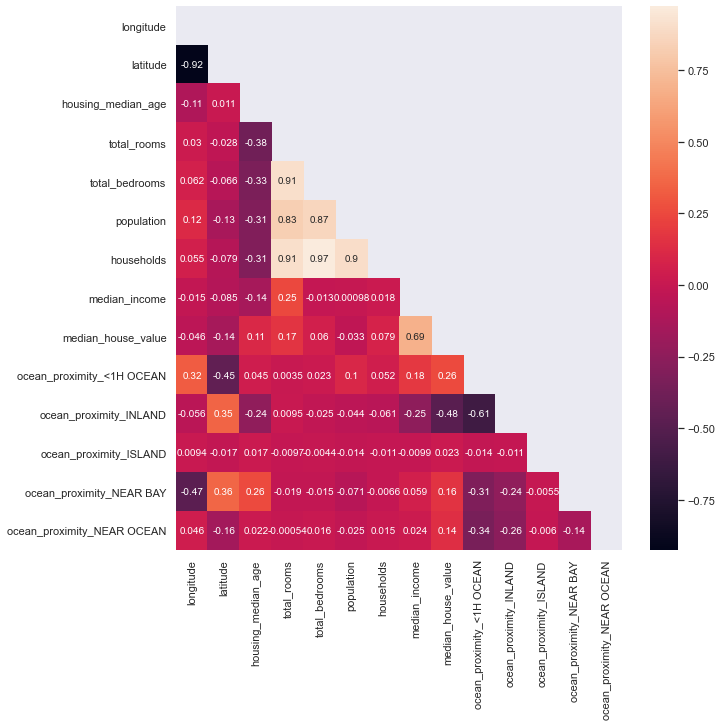

In [23]:
sns.set(font_scale=1,rc={'figure.figsize':(10,10)})
corr=df.corr()
matrix = np.triu(corr)
sns.heatmap(corr,annot=True,annot_kws={'size': 10},mask=matrix)

In [24]:
df=df.drop('total_rooms',axis=1) #dropping total_rooms as it is cor-related witht total_bedrooms & population more than 90% and with population more than 80%

### Splitting Dependent & Independent Variables

In [25]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [26]:
df.shape

(20640, 13)

In [27]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

### Scaling Independent Variable

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
x

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

### Linear Regression Model using sklearn library

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
print('Coefficients: ', lr.coef_)

Coefficients:  [-5.38828018e+04 -5.60248165e+04  1.63706840e+04  3.28339600e+04
 -5.48336492e+04  2.81584136e+04  7.19266934e+04 -7.23066659e+16
 -6.77594292e+16 -2.26549492e+15 -4.57205693e+16 -4.87609703e+16]


In [35]:
print('Variance score: {}'.format(lr.score(x_test, y_test)))

Variance score: 0.6374665563615882


In [36]:
pred_train = lr.predict(x_train)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

In [38]:
print(mse_train)
print(r2_train)

4450217066.048247
0.6644986057377322


In [39]:
pred_test = lr.predict(x_test)

In [40]:
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

In [41]:
print(mse_test)
print(r2_test)

4900998577.542678
0.6374665563615882


In [42]:
print('root_mean_squared error of is=',np.sqrt(mean_squared_error(y_test,pred_test)))

root_mean_squared error of is= 70007.13233337499


<AxesSubplot:xlabel='median_house_value'>

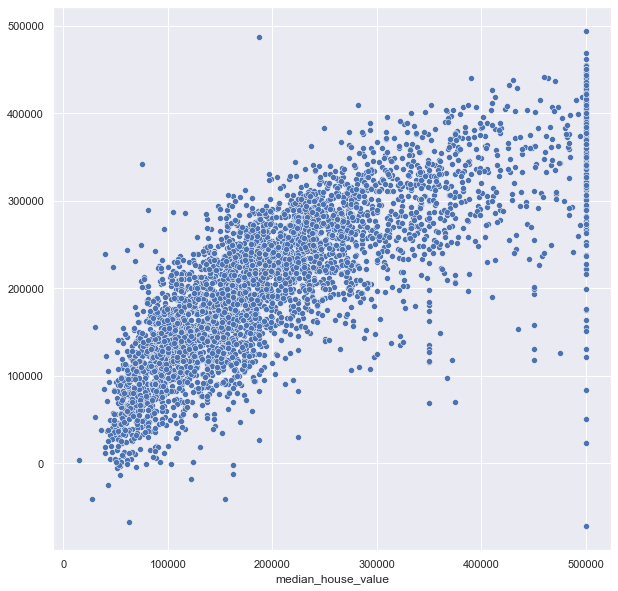

In [43]:
sns.scatterplot(y_test,pred_test)

### Linear Regression Model using statsmodel library

In [44]:
import statsmodels.api as sm

In [45]:
x_test_1 = sm.add_constant(x_test)

In [46]:
res = sm.OLS(y_test, x_test_1)
model=res.fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     657.6
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:55:03   Log-Likelihood:                -51912.
No. Observations:                4128   AIC:                         1.038e+05
Df Residuals:                    4116   BIC:                         1.039e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.062e+05   1433.692    143.845      0.000    2.03e+05    2.09e+05
x1         -5.162e+04   4853.491    -10.635      0.000   -6.11e+04   -4.21e+04
x2         -5.354e+04   5138.058    -10.420      0.000   -6.36e+04   -4.35e+04
x3           1.48e+04   1259.618     11.753      0.000    1.23e+04    1.73e+04
x4           2.96e+04   4780.374      6.192      0.000    2.02e+04     3.9e+04
x5         -5.158e+04   2630.648    -19.606      0.000   -5.67e+04   -4.64e+04
x6          2.666e+04   5568.030      4.788      0.000    1.57e+04    3.76e+04
x7          7.161e+04   1179.115     60.734      0.000    6.93e+04    7.39e+04
x8         -3.911e+17   3.32e+17     -1.178      0.239   -1.04e+18     2.6e+17
x9         -3.665e+17   3.11e+17     -1.178      0.239   -9.77e+17    2.44e+17
x10        -1.225e+16   1.04e+16     -1.178      0.239   -3.27e+16    8.15e+15
x11        -2.473e+17    2.1e+17     -1.178      0.239   -6.59e+17    1.64e+17
x12        -2.638e+17   2.24e+17     -1.178      0.239   -7.03e+17    1.75e+17
==============================================================================
Omnibus:                     1140.006   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4479.978
Skew:                           1.316   Prob(JB):                         0.00
Kurtosis:                       7.372   Cond. No.                     8.88e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
sm_pred_test=model.predict(x_test_1)

In [49]:
sm_pred_test

array([332736., 422848., 154624., ..., 245504., 238080., 329344.])

In [63]:
mse = mean_squared_error(y_test, sm_pred_test)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  4902835891.785852
RMSE:  2451417945.892926


<AxesSubplot:xlabel='median_house_value'>

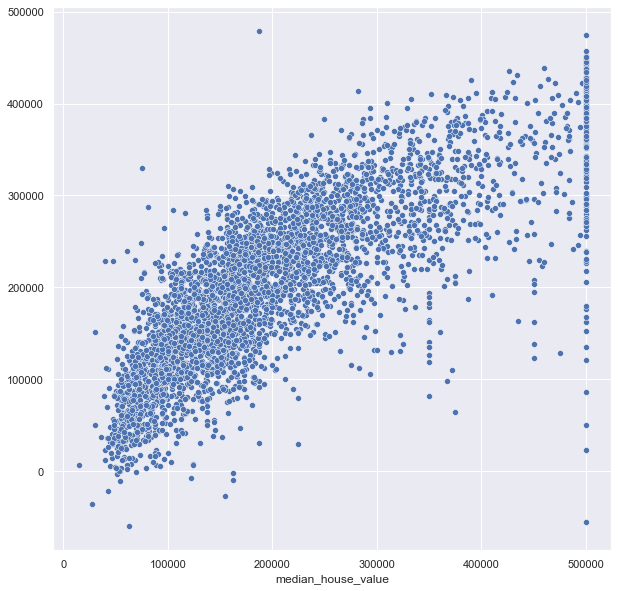

In [50]:
sns.scatterplot(y_test,sm_pred_test)

### Random Forest Regressor Model

In [51]:
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(n_estimators=40,max_depth=9, random_state=0)
RFModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=40, random_state=0)

In [71]:
RFModel.score(x_train,y_train)

0.8279580781928324

In [61]:
test_pred=RFModel.predict(x_test)

In [62]:
mse = mean_squared_error(y_test, test_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  3233283544.475341
RMSE:  1616641772.2376704


In [72]:
# Random Forest Regressor Model gives best result